## Observations and Insights 

In [326]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
study_results_path = "Study_results.csv"
mouse_data_path = "Mouse_metadata.csv"


# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_data = pd.read_csv(mouse_data_path)


# Combine the data into a single dataset

merge_df = pd.merge(study_results, mouse_data, on="Mouse ID", how="left")
# .sort_values(by=['Metastatic Sites'])
                    

# Display the data table for preview
# merge_df.dtypes
merge_df.head()
# merge_df.columns



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice.  
merge_df["Mouse ID"].count()



1893

In [141]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
m_dups = merge_df.drop_duplicates(subset=['Mouse ID'], keep='last')                         

m_dups.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.0,0,Ketapril,Male,15,29
20,x336,0,45.0,0,Naftisol,Female,4,29
53,h428,0,45.0,0,Ketapril,Female,1,27
55,v199,0,45.0,0,Naftisol,Female,17,29
109,o848,0,45.0,0,Stelasyn,Female,14,27


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
m_dups["Mouse ID"].count()



249

In [142]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

m_dups = merge_df.drop_duplicates(subset=['Mouse ID'])                        

m_dups.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice in the clean DataFrame.
m_dups["Mouse ID"].count()


249

In [52]:
m_dups.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

## Summary Statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

m_group = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

m_group.head(15)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

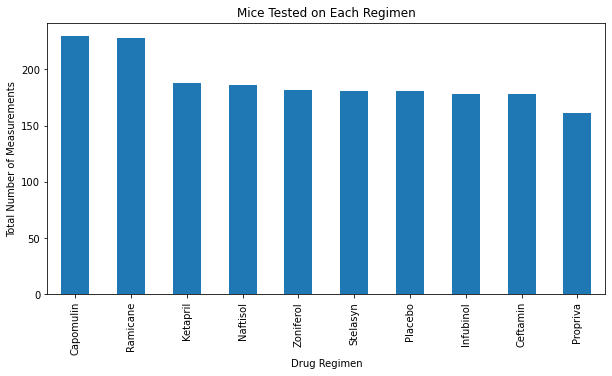

<Figure size 432x288 with 0 Axes>

In [169]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
reg_gb = merge_df.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)

reg_gb.plot(kind="bar", figsize=(10,5))

plt.title("Mice Tested on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

#show chart and set layout
plt.show()
plt.tight_layout()



In [170]:
#looking at the columns for pyplot

reg_gb = merge_df.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)
reg_gb

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Total Number of Measurements')

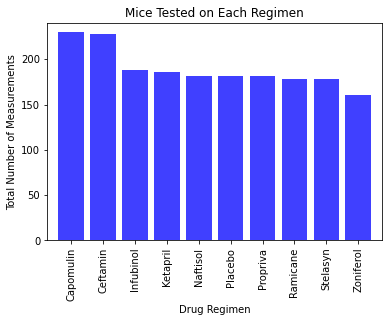

In [213]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Create an array with the datapoints
users = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_gb))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xticks(rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Mice Tested on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")




In [219]:
# #Group by "Mouse ID" and "Sex" to find the unique number of male vs female

gen_gb = merge_df.groupby('Sex')['Mouse ID'].count().reset_index()
gen_gb['Percentage'] = 100 * gen_gb['Mouse ID']  / gen_gb['Mouse ID'].sum()

d = {0:'Female',1:'Male'}

gen_gb.index = gen_gb.index.to_series().map(d)
gen_gb


,Sex,Mouse ID,Percentage
Female,Female,935,49.392499
Male,Male,958,50.607501


Text(0, 0.5, 'Sex')

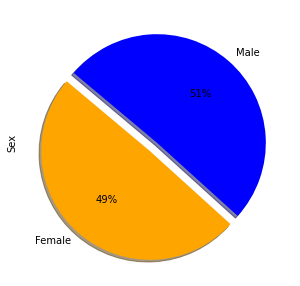

In [225]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['orange', 'blue']
explode = (0.1, 0)
plot = gen_gb.plot.pie(y='Percentage',
                       figsize=(5,5), colors = colors, startangle=140, legend=False,
                             explode = explode, shadow = True, autopct="%1.00f%%")



plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

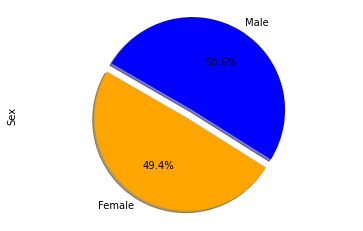

In [359]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.392499,50.607501]

#Set colors for each section of the pie
colors = ['orange', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

#Set equal axis
plt.axis("equal")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [259]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = merge_df.groupby(["Mouse ID"]).max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_reset = mouse_df.reset_index()

merged_data = mouse_reset[['Mouse ID','Timepoint']].\
    merge(merge_df,on=['Mouse ID','Timepoint'],how="left")


def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data

cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


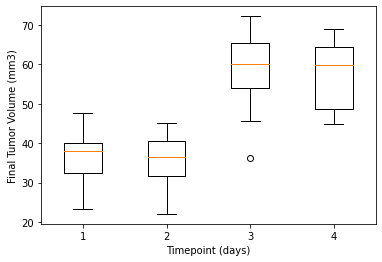

In [338]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin])
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

## Line and Scatter Plots

In [264]:
# Using Mouse ID b128
time_vs_tumer = merge_df[merge_df["Mouse ID"].isin(["b128"])]
time_vs_tumer.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

Text(0.5, 0, 'Timepoint (days)')

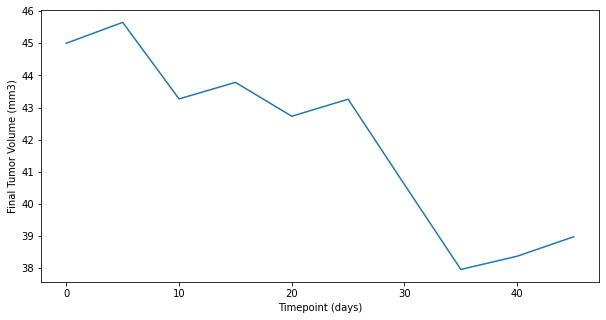

In [286]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tt_col = time_vs_tumer[["Mouse ID","Tumor Volume (mm3)","Timepoint"]]
tt_col

tt_col.plot(x='Timepoint', y='Tumor Volume (mm3)', figsize=(10,5), grid=False, legend=False)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

In [361]:
cap_data = merge_df[merge_df["Drug Regimen"].isin(["Capomulin"])]
cap_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

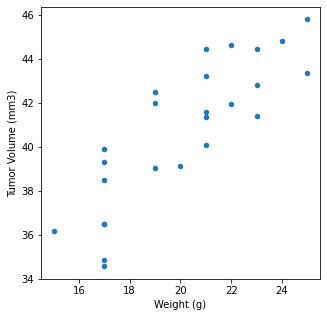

In [365]:
cap_data = cap_data[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]

cap_data = cap_data.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()


cap_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid = False, figsize= (5,5))


## Correlation and Regression

The r-squared is: 0.7088568047708717


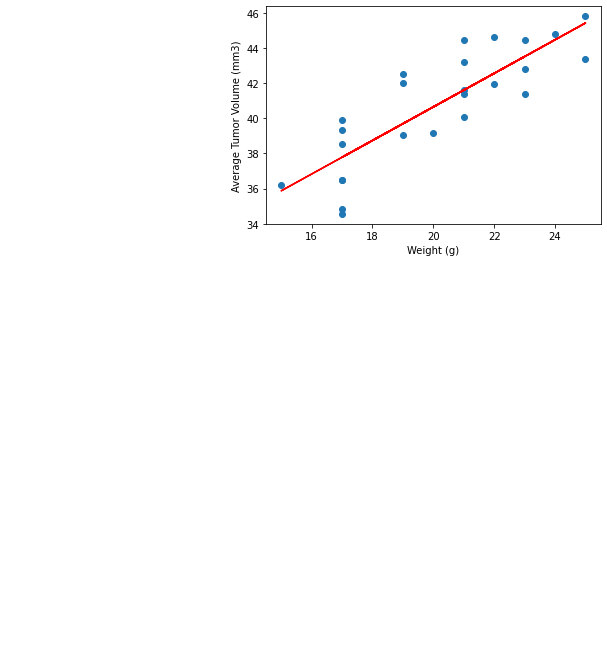

In [364]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_data['Weight (g)']
y_values = cap_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()



In [334]:


# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

SyntaxError: unmatched ')' (<ipython-input-334-3fb2ad37d263>, line 1)